In [ ]:
# importing modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import RocCurveDisplay
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# Loading the data and looking at it and it properties.

Below we see that there are too many features to explore them manually. The strategy will be to train a random forest classifier using all the data, and then look at feature importance scores, and explore those with high values more closely.

In [ ]:
# Loading the data
df = pd.read_csv('data.csv', encoding='latin1')
dictionary = pd.read_csv('dictionary.csv')

In [ ]:
pd.set_option('display.max_rows', None, 'display.max_columns', None)

In [ ]:
df.head()

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
0,Company1,Success,No Info,No Info,-1.0,Video di

In [ ]:
df.describe(include='all')

,Company_Name,Dependent-Company Status,year of founding,Age of company in years,Internet Activity Score,Short Description of company profile,Industry of company,Focus functions of company,Investors,Employee Count,Employees count MoM change,Has the team size grown,Est. Founding Date,Last Funding Date,Last Funding Amount,Country of company,Continent of company,Number of Investors in Seed,Number of Investors in Angel and or VC,Number of Co-founders,Number of of advisors,Team size Senior leadership,Team size all employees,Presence of a top angel or venture fund in previous round of investment,Number of of repeat investors,Number of Sales Support material,Worked in top companies,Average size of companies worked for in the past,Have been part of startups in the past?,Have been part of successful startups in the past?,Was he or she partner in Big 5 consulting?,Consulting experience?,Product or service company?,Catering to product/service across verticals,Focus on private or public data?,Focus on consumer data?,Focus on structured or unstructured data,Subscription based business,Cloud or platform based serive/product?,Local or global player,Linear or Non-linear business model,"Capital intensive business e.g. e-commerce, Engineering products and operations can also cause a business to be capital intensive",Number of of Partners of company,Crowdsourcing based business,Crowdfunding based business,Machine Learning based business,Predictive Analytics business,Speech analytics business,Prescriptive analytics business,Big Data Business,Cross-Channel Analytics/ marketing channels,Owns data or not? (monetization of data) e.g. Factual,Is the company an aggregator/market place? e.g. Bluekai,Online or offline venture - physical location based business or online venture?,B2C or B2B venture?,Top forums like 'Tech crunch' or 'Venture beat' talking about the company/model - How much is it being talked about?,Average Years of experience for founder and co founder,Exposure across the globe,Breadth of experience across verticals,Highest education,Years of education,Specialization of highest education,Relevance of education to venture,Relevance of experience to venture,Degree from a Tier 1 or Tier 2 university?,Renowned in professional circle,Experience in selling and building products,Experience in Fortune 100 organizations,Experience in Fortune 500 organizations,Experience in Fortune 1000 organizations,Top management similarity,Number of Recognitions for Founders and Co-founders,Number of of Research publications,Skills score,Team Composition score,Dificulty of Obtaining Work force,Pricing Strategy,Hyper localisation,Time to market service or product,Employee benefits and salary structures,Long term relationship with other founders,Proprietary or patent position (competitive position),Barriers of entry for the competitors,Company awards,Controversial history of founder or co founder,Legal risk and intellectual property,Client Reputation,google page rank of company website,Technical proficiencies to analyse and interpret unstructured data,Solutions offered,Invested through global incubation competitions?,Industry trend in investing,Disruptiveness of technology,Number of Direct competitors,Employees per year of company existence,Last round of funding received (in milionUSD),"Survival through recession, based on existence of the company through recession times",Time to 1st investment (in months),"Avg time to investment - average across all rounds, measured from previous investment",Gartner hype cycle stage,Time to maturity of technology (in years),Percent_skill_Entrepreneurship,Percent_skill_Operations,Percent_skill_Engineering,Percent_skill_Marketing,Percent_skill_Leadership,Percent_skill_Data Science,Percent_skill_Business Strategy,Percent_skill_Product Management,Percent_skill_Sales,Percent_skill_Domain,Percent_skill_Law,Percent_skill_Consulting,Percent_skill_Finance,Percent_skill_Investment,Renown score
count,472,472,472,428,407.000000,323,348,442,332

In [ ]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 116 columns):
 #    Column                                                                                                                             Dtype  
---   ------                                                                                                                             -----  
 0    Company_Name                                                                                                                       object 
 1    Dependent-Company Status                                                                                                           object 
 2    year of founding                                                                                                                   object 
 3    Age of company in years                                                                                                            object 
 4    Internet Activity 

In [ ]:
df.shape

(472, 116)

# Dropping the columns with nan values and the 'Company Name' column.

Because the size of our dataset is already small but we have many features, I decided to remove the columns with nan values instead of rows.
And I also droped the 'Company Name' column, because evidently it has no predictive power.

In [ ]:
df = df.dropna(axis='columns').reset_index(drop=True)
df = df.drop(['Company_Name'], axis=1)
df.shape

(472, 91)

# Getting the features and the label.

In [ ]:
X = df.drop(['Dependent-Company Status'], axis=1)
Y = df['Dependent-Company Status']

# Dividing our data into train and test sets.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

In [ ]:
x_train.shape

(354, 90)

In [ ]:
x_test.shape

(118, 90)

# Encoding our categorical features.

I decided to use ordinal encoder, because I want feature importance scores to be interpretable.

In [ ]:
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
enc.fit(x_train)
x_train_final = enc.transform(x_train)

In [ ]:
x_train_final.shape

(354, 90)

In [ ]:
x_test_final = enc.transform(x_test)
x_test_final.shape

(118, 90)

# Building and fitting the model.

In [ ]:
model = RandomForestClassifier(random_state=42)

In [ ]:
model.fit(x_train_final, y_train)

RandomForestClassifier(random_state=42)

# Evaluating it.

In [ ]:
model.score(x_test_final, y_test)

0.9067796610169492

In [ ]:
print(classification_report(y_test, model.predict(x_test_final)))

              precision    recall  f1-score   support

      Failed       0.83      0.90      0.86        39
     Success       0.95      0.91      0.93        79

    accuracy                           0.91       118
   macro avg       0.89      0.90      0.90       118
weighted avg       0.91      0.91      0.91       118



In [ ]:
cm = confusion_matrix(y_test, model.predict(x_test_final), labels = model.classes_)
cm

array([[35,  4],
       [ 7, 72]])

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

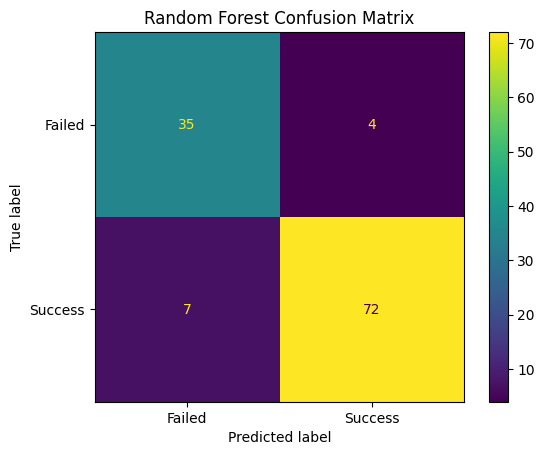

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model.classes_)
disp.plot()
disp.ax_.set_title("Random Forest Confusion Matrix")

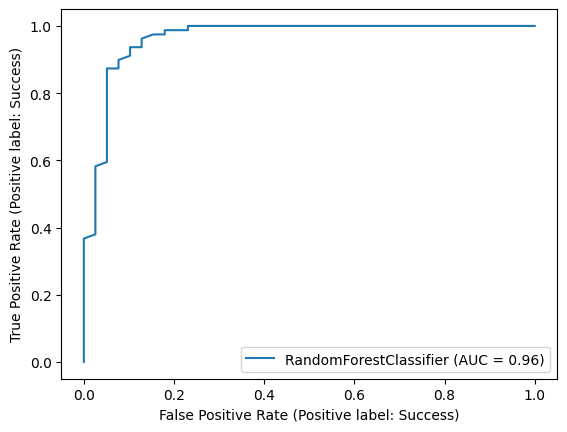

In [ ]:
RocCurveDisplay.from_estimator(model, x_test_final, y_test)
plt.show()

# Extracting feature importances.

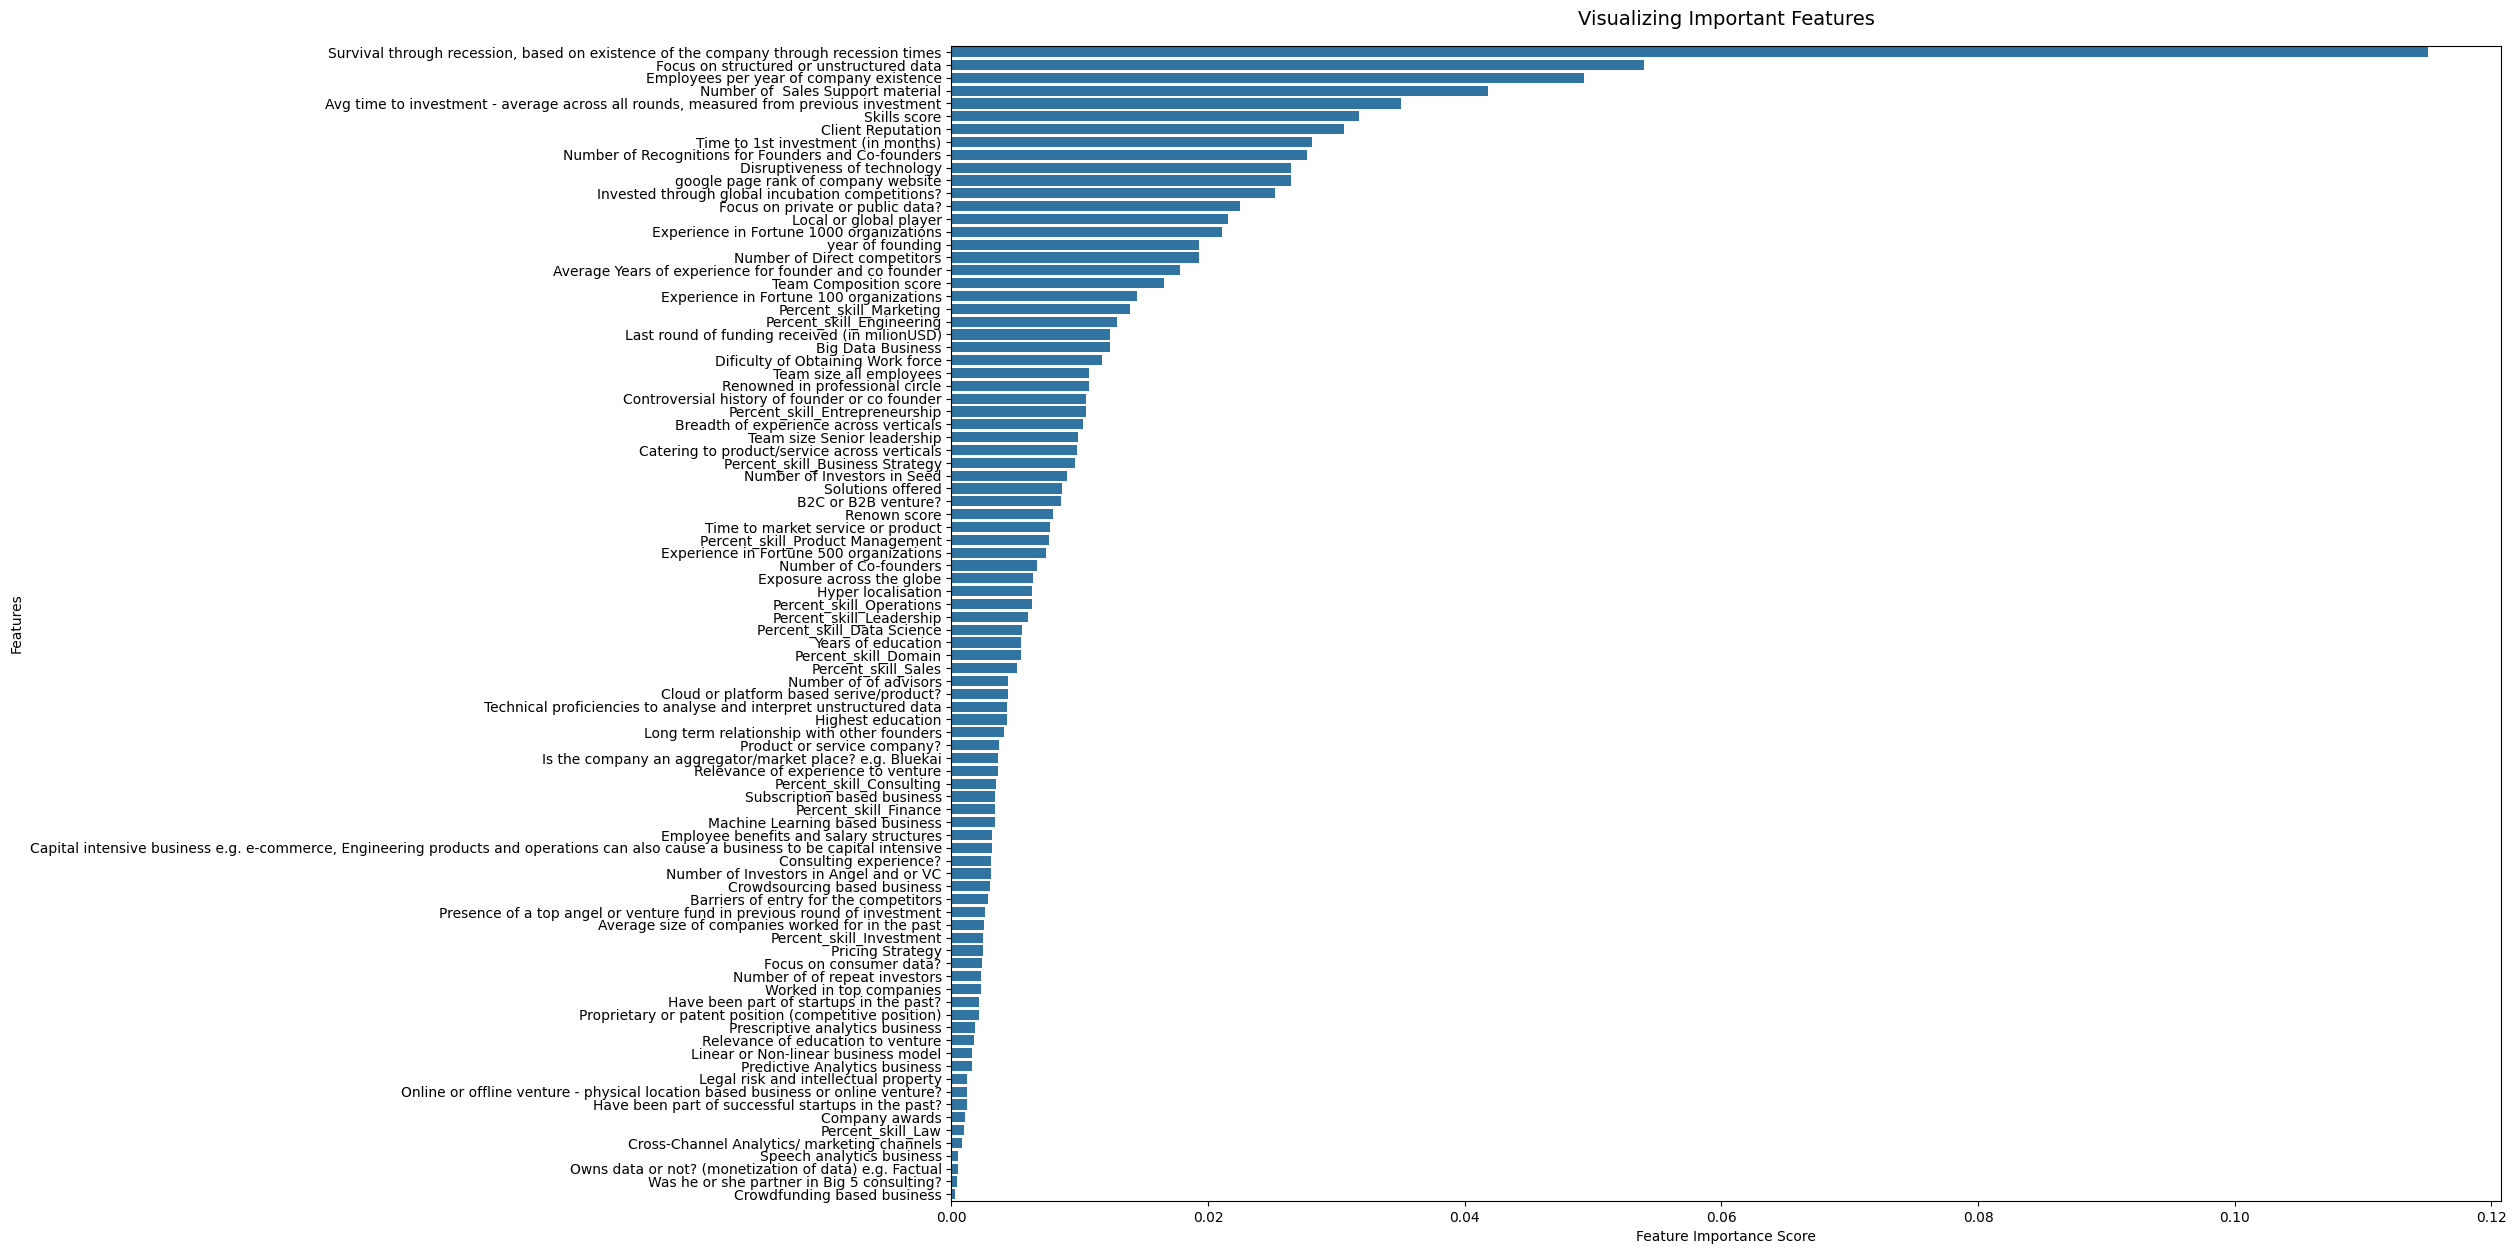

In [ ]:
fig = plt.figure(figsize=(20, 15))

feature_imp = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

sns.barplot(x=feature_imp, y=feature_imp.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features", pad=15, size=14)
plt.savefig('Barplot.png')


# Looking at top 7 features more closely.

1. We see, that some of the categorical features must have predictive power.
2. We also see, that there is a problem, because the 'No Info' value turns the numerical features into categorical ones.
3. Another problem could be, that 'Survival through...' column in some sense leaks infomation about the label, because, if the startup didn't survive, then there is no way it would succeed, but when I trained my second model only on remaining important features, the model performed much worse, so I decided to keep it, but maybe the right decision is to exclude it.

<Axes: xlabel='Survival through recession, based on existence of the company through recession times', ylabel='count'>

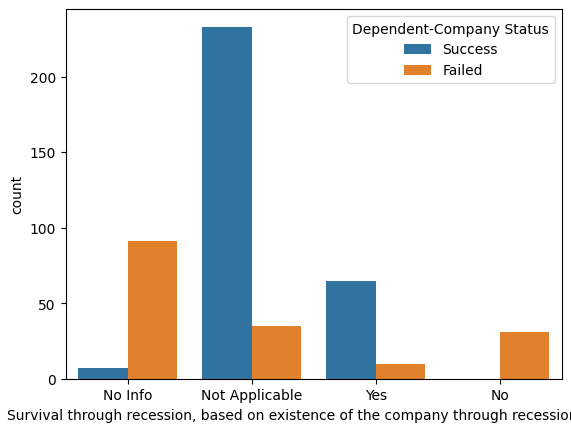

In [ ]:
sns.countplot(x="Survival through recession, based on existence of the company through recession times", hue="Dependent-Company Status", data=df)

We see that 'structured' and 'both' are better then 'unstructured'.

<Axes: xlabel='Focus on structured or unstructured data', ylabel='count'>

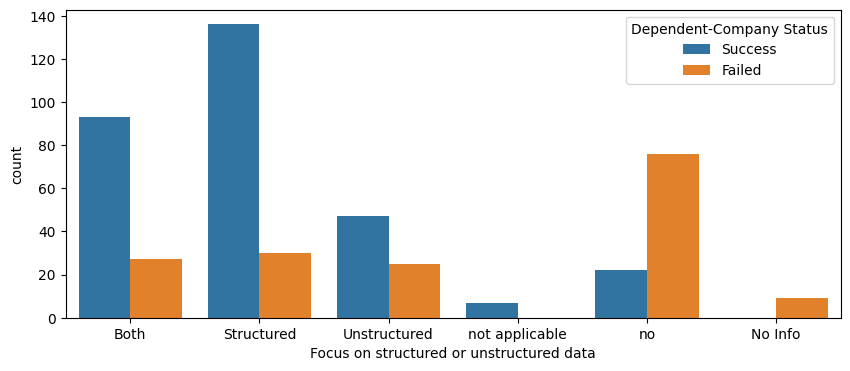

In [ ]:
fig, ax = plt.subplots(figsize=(10, 4))
sns.countplot(x="Focus on structured or unstructured data", hue="Dependent-Company Status", data=df)

<Axes: xlabel='Employees per year of company existence', ylabel='count'>

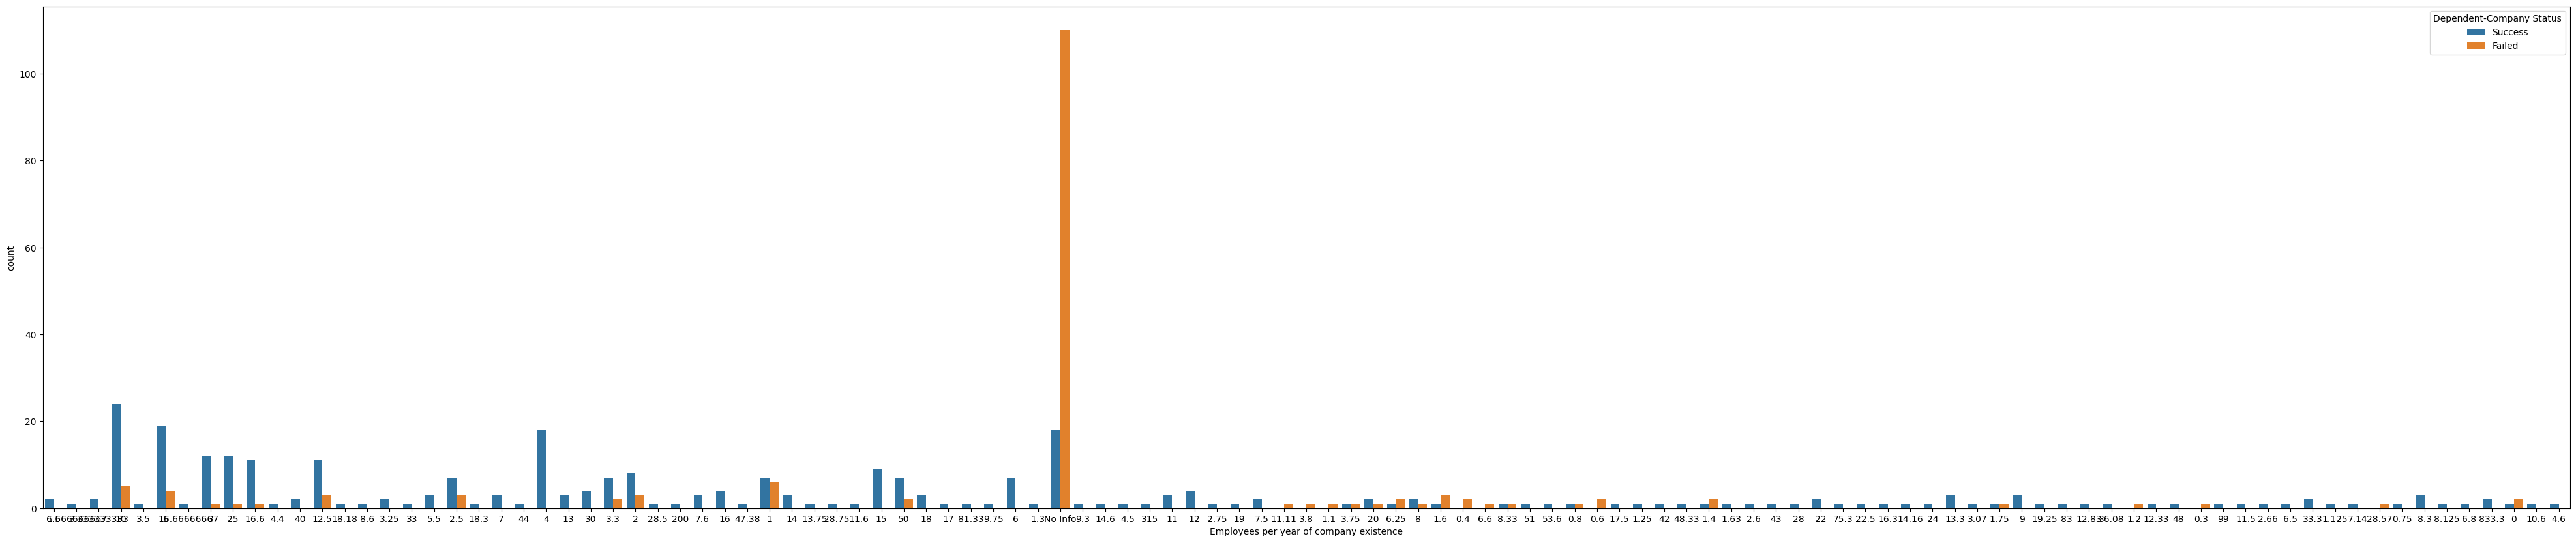

In [ ]:
fig, ax = plt.subplots(figsize=(50, 10))
sns.countplot(x="Employees per year of company existence", hue="Dependent-Company Status", data=df)

In the case of 'Sales support material' having more is better.

<Axes: xlabel='Number of  Sales Support material', ylabel='count'>

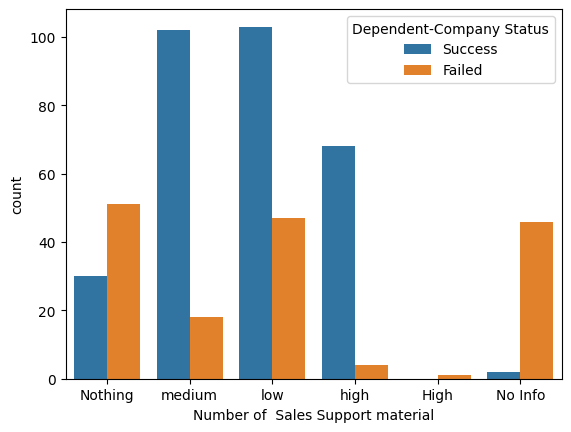

In [ ]:
sns.countplot(x="Number of  Sales Support material", hue="Dependent-Company Status", data=df)

<Axes: xlabel='Avg time to investment - average across all rounds, measured from previous investment', ylabel='count'>

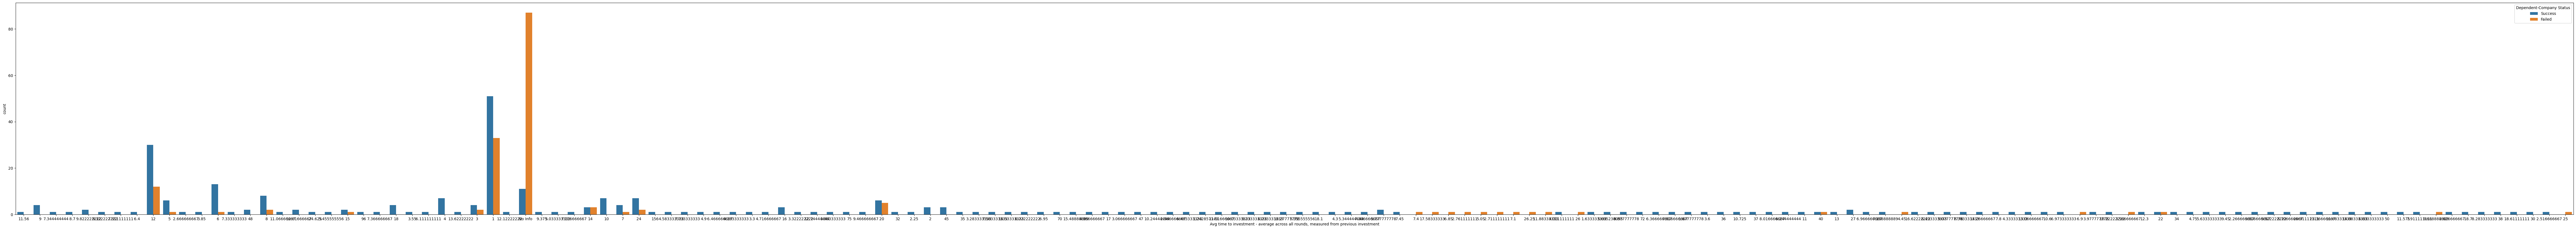

In [ ]:
fig, ax = plt.subplots(figsize=(120, 10))
sns.countplot(x="Avg time to investment - average across all rounds, measured from previous investment", hue="Dependent-Company Status", data=df)

<Axes: xlabel='Skills score', ylabel='count'>

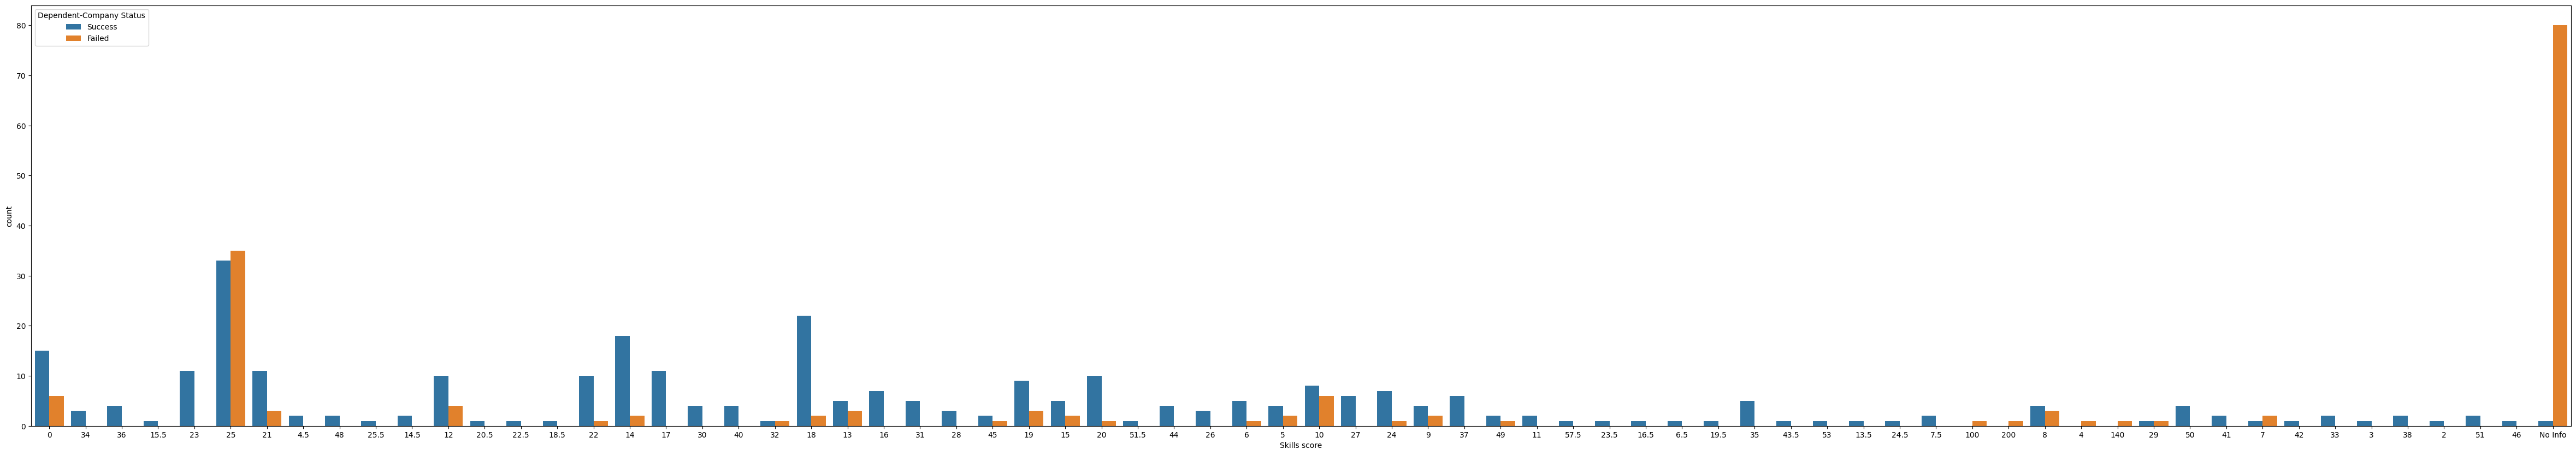

In [ ]:
fig, ax = plt.subplots(figsize=(60, 10))
sns.countplot(x="Skills score", hue="Dependent-Company Status", data=df)

<Axes: xlabel='Client Reputation', ylabel='count'>

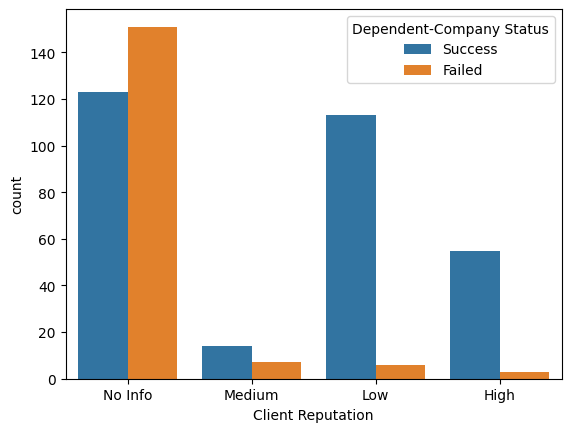

In [ ]:
sns.countplot(x="Client Reputation", hue="Dependent-Company Status", data=df)

# Getting a new dataset, which will contain only some of the important features.

I decided not to include the numerical columns, because for that I would need to delete the rows with 'No Info' values, which will decrease our dataset size too much.
I also didn't include the 'Client Reputation' column in the final version, because my second model performed worse, if the dataset contained that column. And from above visualization we can see that there is no simple pattern, the startups with low and high 'Client Reputation' performed ok, while the ones with medium, not, and also there are too many 'No Info' values.

In [ ]:
df2 = df[['Survival through recession, based on existence of the company through recession times',
          'Focus on structured or unstructured data', 'Number of  Sales Support material', 'Dependent-Company Status']].copy()

In [ ]:
df2.shape

(472, 4)

In [ ]:
X2 = df2.drop(['Dependent-Company Status'], axis=1)
Y2 = df2['Dependent-Company Status']

In [ ]:
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2, Y2, test_size=0.25, random_state=42)

# Encoding the features.

This time I decided to encode them with one hot encoder to maximize the performance.

In [ ]:
enc_hot = OneHotEncoder(handle_unknown='ignore')
enc_hot.fit(x_train2)
x_train2_final = enc_hot.transform(x_train2)

In [ ]:
x_train2_final.shape

(354, 15)

In [ ]:
x_test2_final = enc_hot.transform(x_test2)

# Building and fitting the second model.

In [ ]:
model2 = RandomForestClassifier(random_state=42)

In [ ]:
model2.fit(x_train2_final, y_train2)

RandomForestClassifier(random_state=42)

# Evaluating it.

We see that performance droped, but not too much, and the + is that we have more interpretable model.

In [ ]:
model2.score(x_test2_final, y_test2)

0.864406779661017

In [ ]:
print(classification_report(y_test2, model2.predict(x_test2_final)))

              precision    recall  f1-score   support

      Failed       0.79      0.79      0.79        39
     Success       0.90      0.90      0.90        79

    accuracy                           0.86       118
   macro avg       0.85      0.85      0.85       118
weighted avg       0.86      0.86      0.86       118



In [ ]:
cm = confusion_matrix(y_test2, model2.predict(x_test2_final), labels = model2.classes_)
cm

array([[31,  8],
       [ 8, 71]])

Text(0.5, 1.0, 'Random Forest Confusion Matrix')

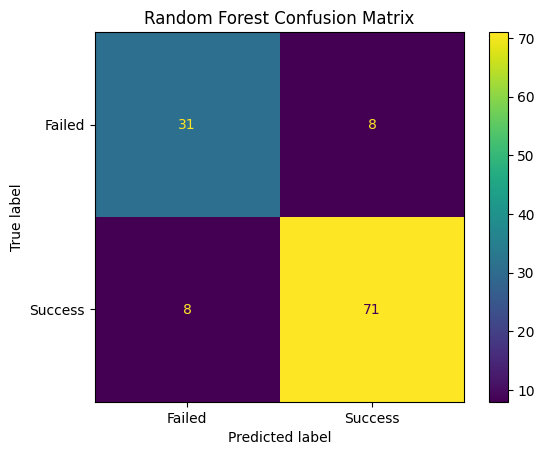

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = model2.classes_)
disp.plot()
disp.ax_.set_title("Random Forest Confusion Matrix")

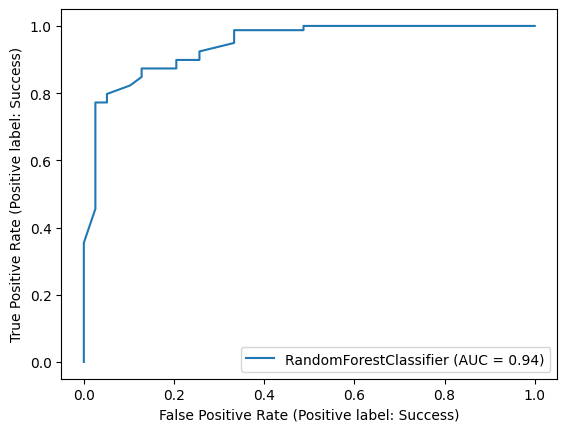

In [ ]:
RocCurveDisplay.from_estimator(model2, x_test2_final, y_test2)
plt.show()

# Conclusion

We saw that most important features are:
1. "Survival through recession, based on existence of the company through recession times"

If a startup survived through hard times, then it has a good chance of success.

2. "Focus on structured or unstructured data"

Startups, which focus on structured data, or on both structured and unstructured, have higher chance of success.

3. 'Number of  Sales Support material'

And startups with more sales support material perform much better.